### Import Libraries
This section imports all the necessary libraries for the project. `numpy` for numerical operations, `tensorflow` for building and training the neural network, and `matplotlib` for plotting images.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

### Load the MNIST Dataset
Loads the MNIST dataset, which consists of 60,000 28x28 grayscale images of the ten digits, along with a test set of 10,000 images.

In [ ]:
(train_images, _), (_, _) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


### Preprocess the Data
This line reshapes the training images to add a channel dimension (making it suitable for Conv2D layers) and normalizes the pixel values to be between 0 and 1.

In [ ]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255

### Select a Sample Image
Selects an individual image for processing. Here, index 1 is chosen arbitrarily, assuming it has vertical edges characteristic of digits like '1'. It also adds a batch dimension to the image using TensorFlow's expand_dims function.

In [ ]:
sample_image = train_images[1]  # Assuming index 1 has a digit with vertical edges
sample_image_expanded = tf.expand_dims(sample_image, axis=0)  # Add batch dimension using TensorFlow

### Define the CNN Model
Defines a simple Convolutional Neural Network (CNN) model with a single convolutional layer. This layer is configured to detect vertical edges in the image by using a specific kernel initializer.

In [ ]:
model = Sequential([
    Conv2D(filters=1, kernel_size=(3, 3), strides=(1, 1), padding='same',
           input_shape=(28, 28, 1), activation='relu',
           kernel_initializer=tf.constant_initializer([[[-1, 0, 1],
                                                         [-1, 0, 1],
                                                         [-1, 0, 1]]]))
])

### Apply the Convolution Operation
Passes the selected image through the CNN model to perform the convolution operation and detect vertical edges.

In [ ]:
conv_output = model(sample_image_expanded)

### Convert the Tensor to a NumPy Array for Visualization
Converts the convolution output from a TensorFlow tensor to a NumPy array, reshaping it to remove the batch and channel dimensions, making it suitable for displaying.

In [ ]:
conv_output_array = np.reshape(conv_output.numpy(), (conv_output.shape[1], conv_output.shape[2]))

### Plot the Original and Convoluted Images
Uses matplotlib to plot the original image alongside the image after convolution, highlighting detected vertical edges.

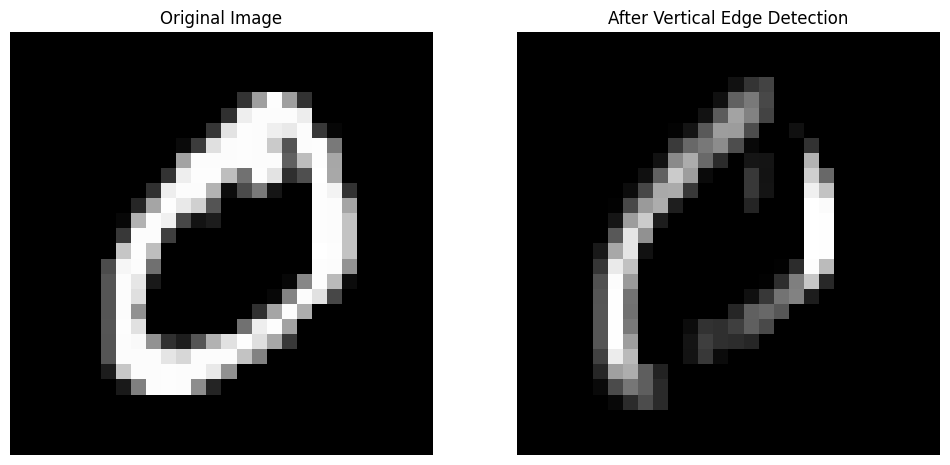

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(sample_image.squeeze(), cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(conv_output_array, cmap='gray')
axes[1].set_title('After Vertical Edge Detection')
axes[1].axis('off')

plt.show()